In [1]:
from   pylab import *
import pandas as pd
from scipy.optimize import curve_fit



In [2]:
ruta1 = "../Nuevo_Zipf/Datos/"

e1 = "EN"
e2 = "FR"
e3 = "GE"
e4 = "IT"
e5 = "SP"

e_ab_a = e1 + '-' + e2
e_ac_a = e1 + '-' + e3
e_ad_a = e1 + '-' + e4
e_ae_a = e1 + '-' + e5

e_ab_b = e2 + '-' + e1
e_ac_b = e2 + '-' + e3
e_ad_b = e2 + '-' + e4
e_ae_b = e2 + '-' + e5

e_ab_c = e3 + '-' + e1
e_ac_c = e3 + '-' + e2
e_ad_c = e3 + '-' + e4
e_ae_c = e3 + '-' + e5

e_ab_d = e4 + '-' + e1
e_ac_d = e4 + '-' + e2
e_ad_d = e4 + '-' + e3
e_ae_d = e4 + '-' + e5

e_ab_e = e5 + '-' + e1
e_ac_e = e5 + '-' + e2
e_ad_e = e5 + '-' + e3
e_ae_e = e5 + '-' + e4

C1_EN = [0, 0.52, 0.67]
C2_EN = [0.470, 0.733, 0.807]

C1_FR = [1, 0.46, 0]
C2_FR = [1, 0.8, 0.36]

C1_GE = [0.53, 0, 0.7]
C2_GE = [0.541, 0.541, 0.717]

C1_IT = [0.19, 0.51, 0.02]
C2_IT = [0.384, 0.662, 0.239]

C1_SP = [0.64, 0, 0]
C2_SP = [1, 0.160, 0.160]

In [3]:
#Ley de Zipf para cada pareja de idiomas origen-receptor
ZM_ab_a = loadtxt(ruta1 +'ZM_ab_a', dtype=float)
ZM_ac_a = loadtxt(ruta1 +'ZM_ac_a', dtype=float)
ZM_ad_a = loadtxt(ruta1 +'ZM_ad_a', dtype=float)
ZM_ae_a = loadtxt(ruta1 +'ZM_ae_a', dtype=float)
ZM_ab_b = loadtxt(ruta1 +'ZM_ab_b', dtype=float)
ZM_ac_b = loadtxt(ruta1 +'ZM_ac_b', dtype=float)
ZM_ad_b = loadtxt(ruta1 +'ZM_ad_b', dtype=float)
ZM_ae_b = loadtxt(ruta1 +'ZM_ae_b', dtype=float)
ZM_ab_c = loadtxt(ruta1 +'ZM_ab_c', dtype=float)
ZM_ac_c = loadtxt(ruta1 +'ZM_ac_c', dtype=float)
ZM_ad_c = loadtxt(ruta1 +'ZM_ad_c', dtype=float)
ZM_ae_c = loadtxt(ruta1 +'ZM_ae_c', dtype=float)
ZM_ab_d = loadtxt(ruta1 +'ZM_ab_d', dtype=float)
ZM_ac_d = loadtxt(ruta1 +'ZM_ac_d', dtype=float)
ZM_ad_d = loadtxt(ruta1 +'ZM_ad_d', dtype=float)
ZM_ae_d = loadtxt(ruta1 +'ZM_ae_d', dtype=float)
ZM_ab_e = loadtxt(ruta1 +'ZM_ab_e', dtype=float)
ZM_ac_e = loadtxt(ruta1 +'ZM_ac_e', dtype=float)
ZM_ad_e = loadtxt(ruta1 +'ZM_ad_e', dtype=float)
ZM_ae_e = loadtxt(ruta1 +'ZM_ae_e', dtype=float)

In [4]:
# DAT = [
    
#     ZM_ab_a,
#     ZM_ac_a,
#     ZM_ad_a,
#     ZM_ae_a,
    
#     ZM_ab_b,
#     ZM_ac_b,
#     ZM_ad_b,
#     ZM_ae_b,
    
#     ZM_ab_c,
#     ZM_ac_c,
#     ZM_ad_c,
#     ZM_ae_c,
    
#     ZM_ab_d,
#     ZM_ac_d,
#     ZM_ad_d,
#     ZM_ae_d,
    
#     ZM_ab_e,
#     ZM_ac_e,
#     ZM_ad_e,
#     ZM_ae_e,
#   ]

# ET = [
    
#     e_ab_a,
#     e_ac_a,
#     e_ad_a,
#     e_ae_a,
    
#     e_ab_b,
#     e_ac_b,
#     e_ad_b,
#     e_ae_b,
    
#     e_ab_c,
#     e_ac_c,
#     e_ad_c,
#     e_ae_c,
    
#     e_ab_d,
#     e_ac_d,
#     e_ad_d,
#     e_ae_d,
    
#     e_ab_e,
#     e_ac_e,
#     e_ad_e,
#     e_ae_e,
#   ]

In [5]:
DAT = [
    
    ZM_ab_b,
    ZM_ab_c,
    ZM_ab_d,
    ZM_ab_e,
    
    ZM_ab_a,
    ZM_ac_c,
    ZM_ac_d,
    ZM_ac_e,
    
    ZM_ac_a,
    ZM_ac_b,
    ZM_ad_d,
    ZM_ad_e,
    
    ZM_ad_a,
    ZM_ad_b,
    ZM_ad_c,
    ZM_ae_e,
    
    ZM_ae_a,
    ZM_ae_b,
    ZM_ae_c,
    ZM_ae_d,
  ]

ET = [
    
    e_ab_b,
    e_ab_c,
    e_ab_d,
    e_ab_e,
    
    e_ab_a,
    e_ac_c,
    e_ac_d,
    e_ac_e,
    
    e_ac_a,
    e_ac_b,
    e_ad_d,
    e_ad_e,
    
    e_ad_a,
    e_ad_b,
    e_ad_c,
    e_ae_e,
    
    e_ae_a,
    e_ae_b,
    e_ae_c,
    e_ae_d
]

In [6]:
rcParams['figure.figsize'] = [15, 15]
rcParams['font.size'] = 18
rcParams['axes.labelsize'] = 18

0.984
-1.149
Coeficiente de determinación (R²): 0.9938651999113277


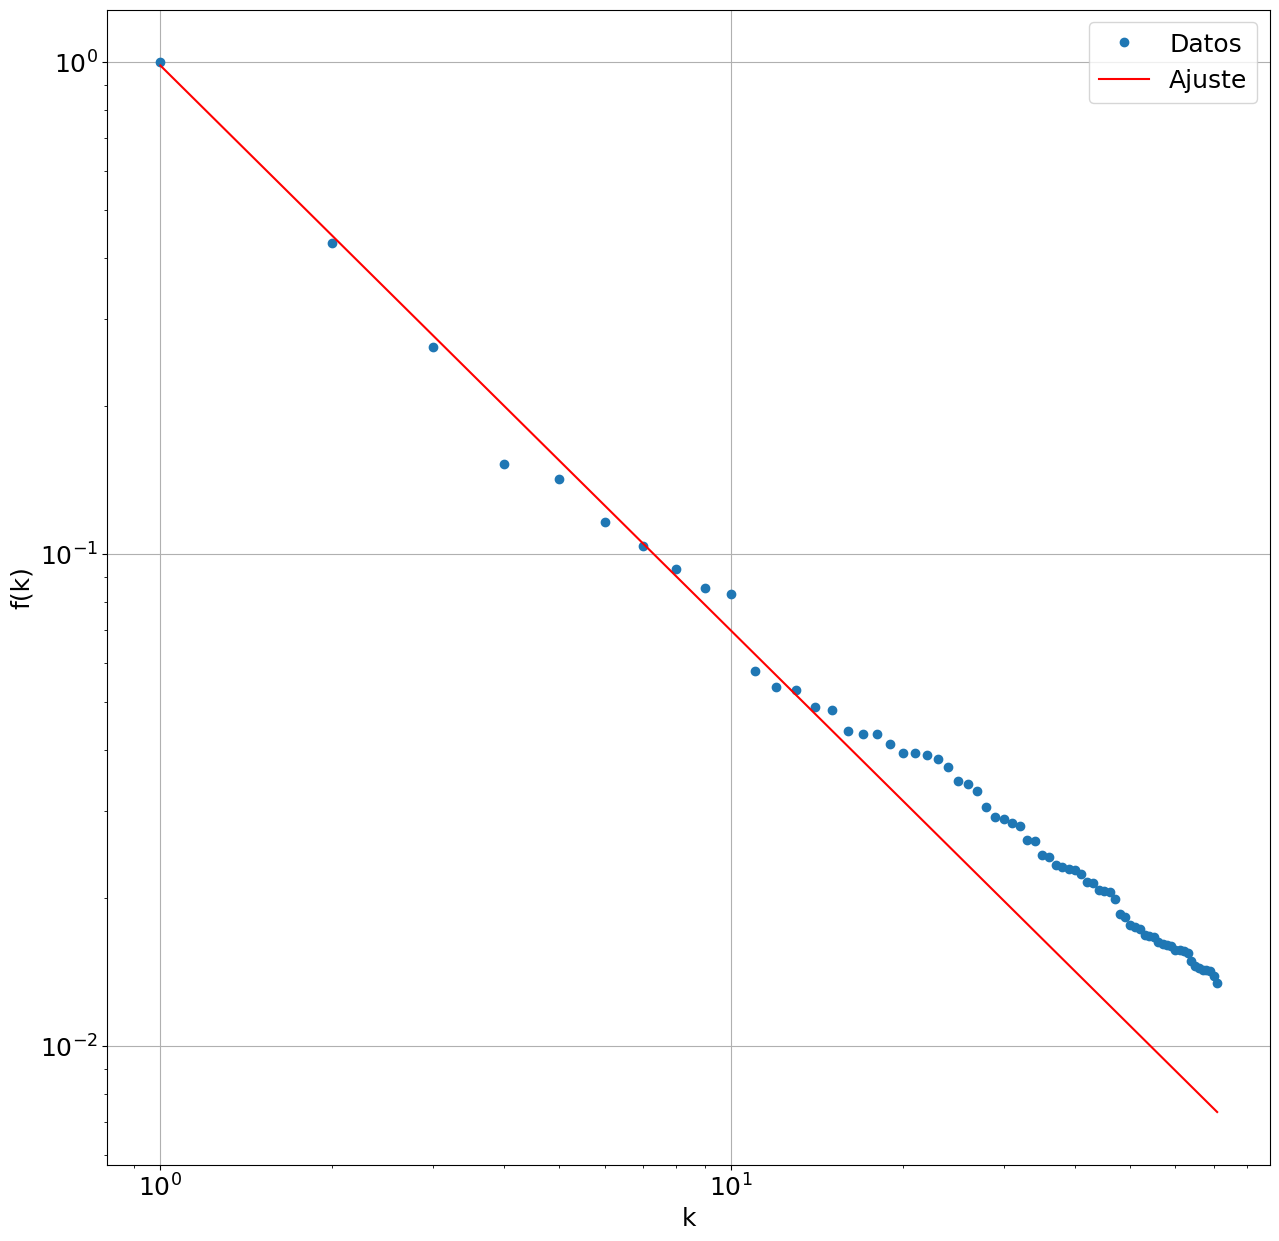

In [7]:
# Define la función a ajustar
def f(k, a, b):
    #return a/k + b
    return a * np.power(k, b) 

k_data = DAT[1][0]
y_data = DAT[1][1]

# Realiza el ajuste de curva para encontrar los parámetros 'a' y 'b'
params, covariance = curve_fit(f, k_data, y_data)

# Obtener los valores de 'a', 'b' y 'c' del ajuste
a_fit, b_fit = params

a_fit, b_fit = round(a_fit,3), round(b_fit,3)

# Calcula los valores predichos por la función ajustada
y_pred = f(k_data, a_fit, b_fit)

# Calcula el coeficiente de determinación (R²)
residuals = y_data - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Imprime el valor de R²
print(a_fit)
print(b_fit)
print("Coeficiente de determinación (R²):", r_squared)

# Grafica los datos originales y la curva ajustada
plot(k_data, y_data, 'o', label='Datos')
plot(k_data, f(k_data, a_fit, b_fit), 'r-', label='Ajuste')
xlabel('k')
ylabel('f(k)')
legend()
grid(True)

xscale('log')
yscale('log')

In [14]:
DF        = pd.DataFrame()

Idioma_A      = []
Idioma_B      = []
Alpha_valores = []
Beta_valores  = []
R_valores     = []
n = 0
for i in range(len(DAT)):
    n += 1
    k_data = DAT[i][0]
    y_data = DAT[i][1]
    par    = ET[i]
    idiomaA = par[:2]
    idiomaB = par[-2:]

    #Ajuste
    params, covariance = curve_fit(f, k_data, y_data)

    #Parametros
    a_fit, b_fit = params

    a_fit, b_fit = round(a_fit,3), round(b_fit,3)

    # Funcion ajustada
    y_pred = f(k_data, a_fit, b_fit)

    # r2
    residuos = y_data - y_pred
    ss_res   = np.sum(residuos**2)
    ss_tot   = np.sum((y_data - np.mean(y_data))**2)
    r2       = round(1 - (ss_res / ss_tot), 3)
    
    
    Idioma_A.append(idiomaA)
    Idioma_B.append(idiomaB)
    Alpha_valores.append(a_fit)
    Beta_valores.append(b_fit)
    R_valores.append(r2)
    if n == 4:
        n = 0
        Idioma_A.append('Todos')
        Idioma_B.append(idiomaB)
        Alpha_valores.append(round(mean(Alpha_valores[-4:]),3 ))
        Beta_valores.append(round(mean(Beta_valores[-4:]),3 ))
        R_valores.append(0)
        
    

DF['Idioma_A']  = Idioma_A
DF['Idioma_B']  = Idioma_B
DF['A_Valores'] = Alpha_valores
DF['B_Valores'] = Beta_valores
DF['R2'] = R_valores

tabla_latex = DF.to_latex(index=False)

# Imprimir el código LaTeX
print(tabla_latex)

\begin{tabular}{llrrr}
\toprule
Idioma\_A & Idioma\_B &  A\_Valores &  B\_Valores &    R2 \\
\midrule
      FR &       EN &      1.366 &     -0.506 & 0.905 \\
      GE &       EN &      0.984 &     -1.149 & 0.994 \\
      IT &       EN &      1.168 &     -0.631 & 0.946 \\
      SP &       EN &      1.201 &     -0.580 & 0.946 \\
   Todos &       EN &      1.180 &     -0.716 & 0.000 \\
      EN &       FR &      1.156 &     -0.541 & 0.955 \\
      GE &       FR &      1.033 &     -0.802 & 0.985 \\
      IT &       FR &      0.976 &     -0.894 & 0.992 \\
      SP &       FR &      1.261 &     -0.646 & 0.910 \\
   Todos &       FR &      1.106 &     -0.721 & 0.000 \\
      EN &       GE &      0.868 &     -0.797 & 0.948 \\
      FR &       GE &      1.345 &     -0.496 & 0.878 \\
      IT &       GE &      0.909 &     -0.956 & 0.944 \\
      SP &       GE &      1.140 &     -0.630 & 0.936 \\
   Todos &       GE &      1.066 &     -0.720 & 0.000 \\
      EN &       IT &      1.241 &     -0.4

C:\Users\josue\AppData\Local\Temp\ipykernel_6088\2564575350.py:56: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabla_latex = DF.to_latex(index=False)
